<a href="https://colab.research.google.com/github/Geek-a-Byte/AlertTrace/blob/main/AlertTrace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

In [ ]:
df = pd.read_csv( '/content/2001-01-01-2021-11-01-South_Asia-Bangladesh.csv', encoding='latin-1')
df.head()

data_id  iso event_id_cnty  event_id_no_cnty        event_date  year  \
0  8640734   50      BGD20764             20764  01 November 2021  2021   
1  8640735   50      BGD20765             20765  01 November 2021  2021   
2  8641081   50      BGD20759             20759  01 November 2021  2021   
3  8641083   50      BGD20762             20762  01 November 2021  2021   
4  8641092   50      BGD20761             20761  01 November 2021  2021   

   time_precision                  event_type         sub_event_type  \
0               1  Violence against civilians                 Attack   
1               1                       Riots  Violent demonstration   
2               1                       Riots           Mob violence   
3               1                       Riots           Mob violence   
4               1                       Riots           Mob violence   

                                actor1  ...   location  latitude longitude  \
0  Police Forces of Bangladesh (2009-)  ...     Kaunia   25.7743   89.4297   
1                 Rioters (Bangladesh)  ...     Kaunia   25.7743   89.4297   
2                 Rioters (Bangladesh)  ...    Noamala   22.3678   90.5291   
3                 Rioters (Bangladesh)  ...  Haluaghat   25.1171   90.3364   
4                 Rioters (Bangladesh)  ...   Kaliganj   23.4096   89.1380   

  geo_precision                                         source  source_scale  \
0             2  New Age (Bangladesh); Daily Star (Bangladesh)      National   
1             2  Daily Star (Bangladesh); New Age (Bangladesh)      National   
2             1                                    Prothom Alo      National   
3             2                                    Prothom Alo      National   
4             1                                    Prothom Alo      National   

                                               notes fatalities   timestamp  \
0  On 1 November 2021, police personnel beat up a...          1  1636483659   
1  On 1 November 2021, hundreds of locals attacke...          0  1636483659   
2  On 1 November 2021, a clash broke out between ...          0  1636483660   
3  On 1 November 2021, a clash broke out between ...          0  1636483660   
4  On 1 November 2021, a group of assailants beat...          0  1636483660   

  iso3  
0  BGD  
1  BGD  
2  BGD  
3  BGD  
4  BGD  

[5 rows x 31 columns]

# Data Analysis

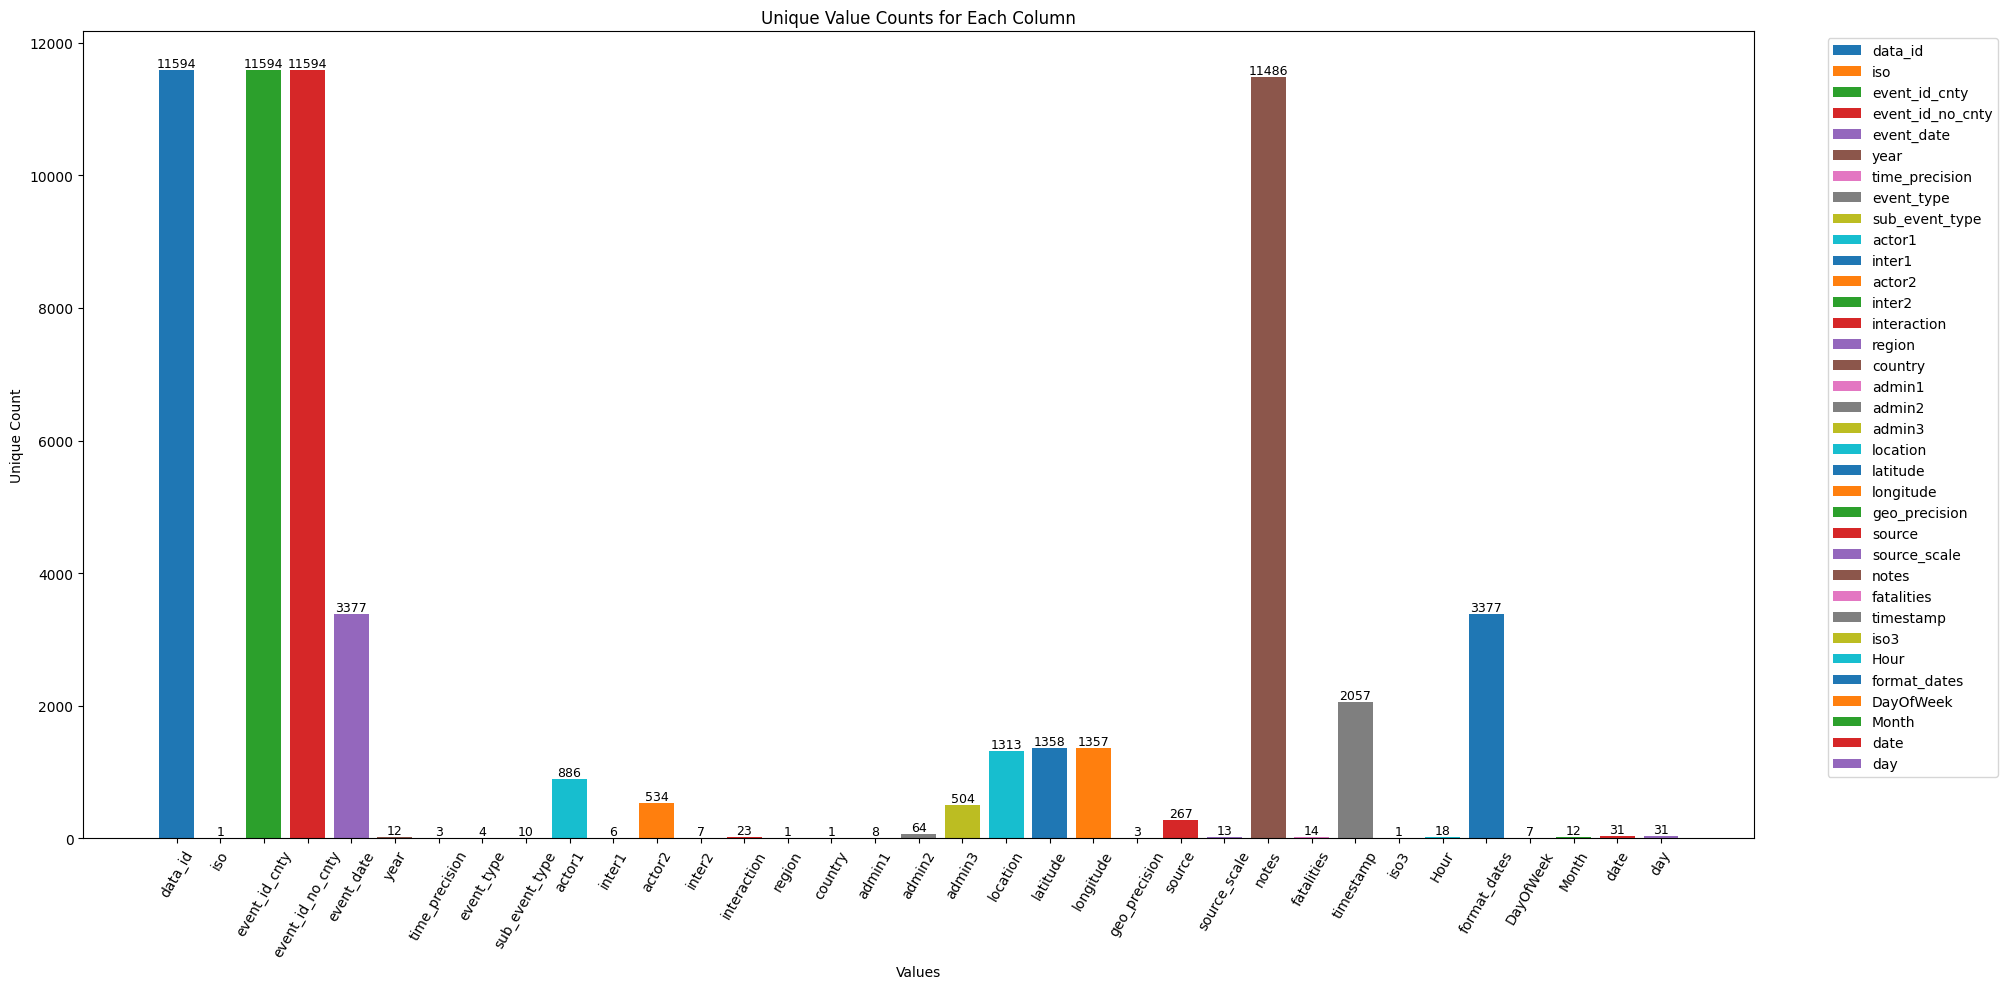

In [ ]:
# Create a dictionary to store value count results for each column
value_count_results = {}

# Count duplicate occurrences for each column
for column in df.columns:
    value_counts = df.pivot_table(index = column, aggfunc ='size')
    value_count_results[column] = value_counts

# # Print the value count results
# for column, value_counts in value_count_results.items():
#     print(f"Value counts for {column}:\n{value_counts}\n")
#     print(f"unique value counts for {column}:\n{len(value_counts)}\n")

# Visualize value count results
plt.figure(figsize=(20, 10))
for column,value_counts in value_count_results.items():
    bars = plt.bar(column, len(value_counts), label=column)
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, yval, va='bottom', ha='center', fontsize=9)


plt.title('Unique Value Counts for Each Column')
plt.xlabel('Values')
plt.ylabel('Unique Count')
plt.xticks(rotation=60)
# Add a legend in the upper left corner
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.tight_layout()
plt.show()


In [ ]:
# Assuming your dataset has columns: 'latitude', 'longitude', and 'crime_type'
data=df
# Define the geographical area (latitude and longitude bounds)
min_latitude = 20.9
max_latitude = 26.5
min_longitude = 88.1
max_longitude = 92.5

# Filter the data based on geographical bounds
filtered_data = data[
    (data['latitude'] >= min_latitude) & (data['latitude'] <= max_latitude) &
    (data['longitude'] >= min_longitude) & (data['longitude'] <= max_longitude)
]

# Group and count unique crime types
crime_type_counts = filtered_data['event_type'].value_counts()

crime_type_counts

Riots                         8382
Violence against civilians    2971
Battles                       1785
Explosions/Remote violence     218
Name: event_type, dtype: int64

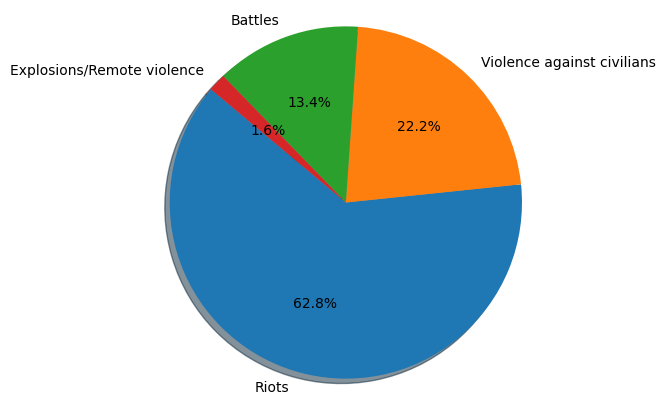

0

In [ ]:
def pie_plot(list_number, list_unique):
    plt.figure(figsize=(5,5))
    plt.pie(list_unique,
        labels=list_number,
        autopct='%1.1f%%',
        shadow=True,
        startangle=140)

    plt.axis('equal')
    plt.show()
    return 0

list_unique=[8382,2971,1785,218]
list_number=['Riots','Violence against civilians','Battles', 'Explosions/Remote violence']
pie_plot(list_number, list_unique)

# K means Clustering

In [ ]:
# Group data by latitude and longitude and count occurrences
grouped_data = data.groupby(['location','latitude', 'longitude']).size().reset_index(name='crime_count').sort_values(by='crime_count', ascending=False)

grouped_data

location  latitude  longitude  crime_count
404        Dhaka   23.7104    90.4074          769
349   Chittagong   22.3571    91.7823          420
1190    Rajshahi   24.3740    88.6011          369
1361      Sylhet   24.8990    91.8720          343
818       Khulna   22.8097    89.5643          175
...          ...       ...        ...          ...
647    Hosenabad   24.0452    88.8386            1
648   Hossainpur   23.6565    88.9392            1
652        Ikram   24.3998    91.2926            1
653         Ilsa   22.0750    91.9013            1
1423     Zinjira   23.7044    90.3929            1

[1424 rows x 4 columns]

In [ ]:
!pip install folium pandas

In [ ]:
import folium
import pandas as pd

# Assuming your dataset has columns: 'latitude', 'longitude', and 'crime_count'

# Create a map centered on Bangladesh
bangladesh_map = folium.Map(location=[23.6850, 90.3563], zoom_start=7)

# Add crime count markers to the map
for index, row in grouped_data.iterrows():
    lat = row['latitude']
    lon = row['longitude']
    crime_count = row['crime_count']

    # Create a circle marker with radius based on crime count
    folium.CircleMarker(
        location=[lat, lon],
        radius=crime_count / 10,  # You might need to adjust this scaling
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        popup=f"Crime Count: {crime_count}"
    ).add_to(bangladesh_map)

# Save the map to an HTML file
bangladesh_map.save('crime_count_map.html')


In [ ]:
# Define the event type you want to count
riot = 'Riots'

# Initialize a dictionary to store location-specific event counts
riot_event_counts = {}

# Loop through each latitude and longitude column
lat_col = 'latitude'
lon_col = 'longitude'

# Filter the data for the current latitude and longitude columns and the target event type
filtered_data_riot = data[
    (data[lat_col].notnull()) & (data[lon_col].notnull()) &
    (data['event_type'] == riot)
]

# Loop through the filtered data to count occurrences at each location
for index, row in filtered_data_riot.iterrows():
    location = (row[lat_col], row[lon_col])
    riot_event_counts[location] = riot_event_counts.get(location, 0) + 1

# ----------------------------------------------------------------------------------------------------
# Define the event type you want to count
violence = 'Violence against civilians'

# Initialize a dictionary to store location-specific event counts
violence_event_counts = {}

# Loop through each latitude and longitude column
lat_col = 'latitude'
lon_col = 'longitude'

# Filter the data for the current latitude and longitude columns and the target event type
filtered_data_violence = data[
    (data[lat_col].notnull()) & (data[lon_col].notnull()) &
    (data['event_type'] == violence)
]

# Loop through the filtered data to count occurrences at each location
for index, row in filtered_data_violence.iterrows():
    location = (row[lat_col], row[lon_col])
    violence_event_counts[location] = violence_event_counts.get(location, 0) + 1

# ----------------------------------------------------------------------------------------------------
# Define the event type you want to count
violence = 'Violence against civilians'

# Initialize a dictionary to store location-specific event counts
violence_event_counts = {}

# Loop through each latitude and longitude column
lat_col = 'latitude'
lon_col = 'longitude'

# Filter the data for the current latitude and longitude columns and the target event type
filtered_data_violence = data[
    (data[lat_col].notnull()) & (data[lon_col].notnull()) &
    (data['event_type'] == violence)
]

# Loop through the filtered data to count occurrences at each location
for index, row in filtered_data_violence.iterrows():
    location = (row[lat_col], row[lon_col])
    violence_event_counts[location] = violence_event_counts.get(location, 0) + 1


# ----------------------------------------------------------------------------------------------------
# Define the event type you want to count
battles = 'Battles'

# Initialize a dictionary to store location-specific event counts
battles_event_counts = {}

# Loop through each latitude and longitude column
lat_col = 'latitude'
lon_col = 'longitude'

# Filter the data for the current latitude and longitude columns and the target event type
filtered_data_battles = data[
    (data[lat_col].notnull()) & (data[lon_col].notnull()) &
    (data['event_type'] == battles)
]

# Loop through the filtered data to count occurrences at each location
for index, row in filtered_data_battles.iterrows():
    location = (row[lat_col], row[lon_col])
    battles_event_counts[location] = battles_event_counts.get(location, 0) + 1

# ----------------------------------------------------------------------------------------------------
# Define the event type you want to count
explosions = 'Explosions/Remote violence'

# Initialize a dictionary to store location-specific event counts
explosions_event_counts = {}

# Loop through each latitude and longitude column
lat_col = 'latitude'
lon_col = 'longitude'

# Filter the data for the current latitude and longitude columns and the target event type
filtered_data_explosions = data[
    (data[lat_col].notnull()) & (data[lon_col].notnull()) &
    (data['event_type'] == explosions)
]

# Loop through the filtered data to count occurrences at each location
for index, row in filtered_data_explosions.iterrows():
    location = (row[lat_col], row[lon_col])
    explosions_event_counts[location] = explosions_event_counts.get(location, 0) + 1

# Create a copy of the original DataFrame
data_with_counts = data.copy()

# Add a new column for event count based on the location_event_counts dictionary
data_with_counts['riot_count'] = data_with_counts.apply(lambda row: riot_event_counts.get((row['latitude'], row['longitude']), 0), axis=1)
data_with_counts['violence_count'] = data_with_counts.apply(lambda row: violence_event_counts.get((row['latitude'], row['longitude']), 0), axis=1)
data_with_counts['battle_count'] = data_with_counts.apply(lambda row: battles_event_counts.get((row['latitude'], row['longitude']), 0), axis=1)
data_with_counts['explosion_count'] = data_with_counts.apply(lambda row: explosions_event_counts.get((row['latitude'], row['longitude']), 0), axis=1)

# Group data by latitude and longitude and count occurrences
grouped_data = data_with_counts.groupby(['location','latitude', 'longitude','riot_count','violence_count','battle_count','explosion_count']).size().reset_index(name='crime_count').sort_values(by='crime_count', ascending=False)

grouped_data
# # Print the event counts for each location
# for location, count in riot_event_counts.items():
#     print(f"Event Count at Latitude {location[0]}, Longitude {location[1]}: {count}")

location  latitude  longitude  riot_count  violence_count  \
404        Dhaka   23.7104    90.4074         587             107   
349   Chittagong   22.3571    91.7823         317              58   
1190    Rajshahi   24.3740    88.6011         249              80   
1361      Sylhet   24.8990    91.8720         248              73   
818       Khulna   22.8097    89.5643         119              34   
...          ...       ...        ...         ...             ...   
647    Hosenabad   24.0452    88.8386           1               0   
648   Hossainpur   23.6565    88.9392           1               0   
652        Ikram   24.3998    91.2926           0               0   
653         Ilsa   22.0750    91.9013           0               1   
1423     Zinjira   23.7044    90.3929           1               0   

      battle_count  explosion_count  crime_count  
404             41               34          769  
349             36                9          420  
1190            32                8          369  
1361            22                0          343  
818             13                9          175  
...            ...              ...          ...  
647              0                0            1  
648              0                0            1  
652              1                0            1  
653              0                0            1  
1423             0                0            1  

[1424 rows x 8 columns]

In [ ]:
# Replace 'column_name' with the actual column name you want to use as the index
crime_rates = grouped_data.set_index('location')

crime_rates=crime_rates[['riot_count','violence_count','battle_count','explosion_count']]
crime_rates

riot_count  violence_count  battle_count  explosion_count
location                                                             
Dhaka              587             107            41               34
Chittagong         317              58            36                9
Rajshahi           249              80            32                8
Sylhet             248              73            22                0
Khulna             119              34            13                9
...                ...             ...           ...              ...
Hosenabad            1               0             0                0
Hossainpur           1               0             0                0
Ikram                0               0             1                0
Ilsa                 0               1             0                0
Zinjira              1               0             0                0

[1424 rows x 4 columns]

In [ ]:
crime_rates.describe()

riot_count  violence_count  battle_count  explosion_count
count  1424.000000     1424.000000   1424.000000      1424.000000
mean      5.892556        2.095506      1.257022         0.153090
std      23.428343        6.152262      3.503630         1.144091
min       0.000000        0.000000      0.000000         0.000000
25%       1.000000        0.000000      0.000000         0.000000
50%       1.000000        0.000000      0.000000         0.000000
75%       4.000000        2.000000      1.000000         0.000000
max     587.000000      107.000000     46.000000        34.000000

In [ ]:
#standardize the data to normal distribution
from sklearn import preprocessing
crime_rates_standardized = preprocessing.scale(crime_rates)
print(crime_rates_standardized)
crime_rates_standardized = pd.DataFrame(crime_rates_standardized)

[[24.81232212 17.05736089 11.34735592 29.59450941]
 [13.28377083  9.09001222  9.91976335  7.73541702]
 [10.38028384 12.66718917  8.77768929  6.86105333]
 ...
 [-0.25160236 -0.34072702 -0.07338467 -0.13385624]
 [-0.25160236 -0.17812807 -0.35890319 -0.13385624]
 [-0.20890402 -0.34072702 -0.35890319 -0.13385624]]


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 8))
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(crime_rates_standardized)
    wcss.append(kmeans.inertia_) #criterion based on which K-means clustering works
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(crime_rates_standardized)

y_kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 2, 2, ..., 0, 0, 0], dtype=int32)

In [ ]:
#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans+1

# New list called cluster
cluster = list(y_kmeans1)
# Adding cluster to our data set
crime_rates['cluster'] = cluster

In [ ]:
#Mean of clusters 1 to 4
kmeans_mean_cluster = pd.DataFrame(round(crime_rates.groupby('cluster').mean(),1))
kmeans_mean_cluster

riot_count  violence_count  battle_count  explosion_count
cluster                                                           
1               2.5             1.0           0.5              0.0
2             587.0           107.0          41.0             34.0
3             150.0            47.5          28.9              5.6
4              32.8            11.2           8.2              0.8

<Axes: xlabel='riot_count', ylabel='violence_count'>

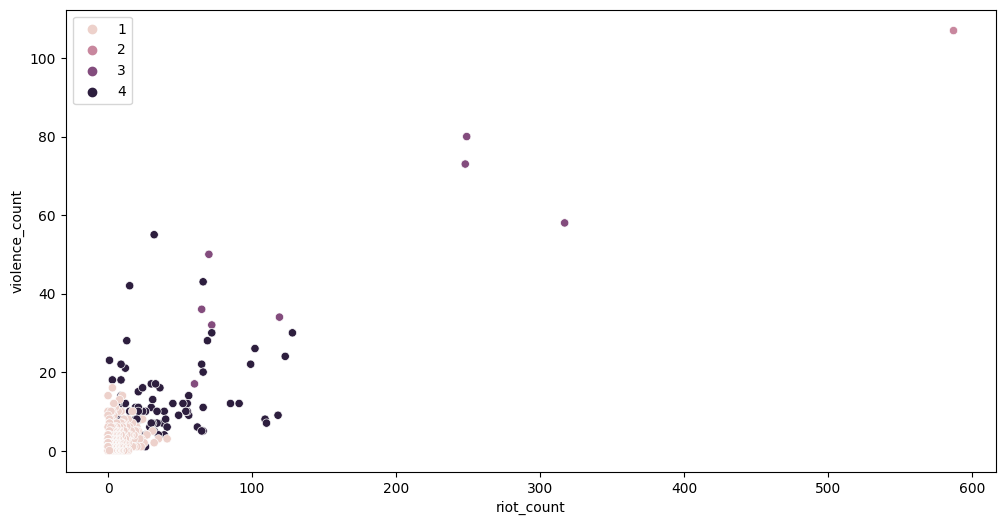

In [ ]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.scatterplot(x=crime_rates['riot_count'], y = crime_rates['violence_count'],hue=y_kmeans1)

In [ ]:
crime_rates[crime_rates['cluster']==4]

riot_count  violence_count  battle_count  explosion_count  \
location                                                                      
Bogra                    128              30             7                1   
Barisal                  123              24            12                0   
Savar                    102              26            14                2   
Gazipur                  118               9             7                0   
Dhaka - Shahbagh          99              22             7                5   
...                      ...             ...           ...              ...   
Ataikula                   1               2            14                2   
Shyamnagar                 7               4             6                1   
Araihazar                  9               1             7                1   
Baghmara                   6               4             6                1   
Phultala                   3               2             7                2   

                  cluster  
location                   
Bogra                   4  
Barisal                 4  
Savar                   4  
Gazipur                 4  
Dhaka - Shahbagh        4  
...                   ...  
Ataikula                4  
Shyamnagar              4  
Araihazar               4  
Baghmara                4  
Phultala                4  

[102 rows x 5 columns]

In [ ]:
df['format_dates'] = pd.to_datetime(df['event_date'])
df['DayOfWeek'] = df['format_dates'].dt.day_name()
df['Month'] = df['format_dates'].dt.month_name()
df['day']=df['format_dates'].dt.day

In [ ]:
crime_rate_2018=df['admin1'].loc[df['year']==2018].value_counts()
crime_rate_2019=df['admin1'].loc[df['year']==2019].value_counts()
crime_rate_2020=df['admin1'].loc[df['year']==2020].value_counts()
crime_rate_2021=df['admin1'].loc[df['year']==2021].value_counts()
combined_df = pd.DataFrame({
    '2018': crime_rate_2018,
    '2019': crime_rate_2019,
    '2020': crime_rate_2020,
    '2021': crime_rate_2021
})
combined_df

2018  2019  2020  2021
Barisal       51    47    28    69
Chittagong   167   157   109   191
Dhaka        213   206   160   164
Khulna        81   115    80    77
Mymensingh    23    34    15    19
Rajshahi     100    86    66    62
Rangpur       32    54    43    46
Sylhet        50    73    31    46

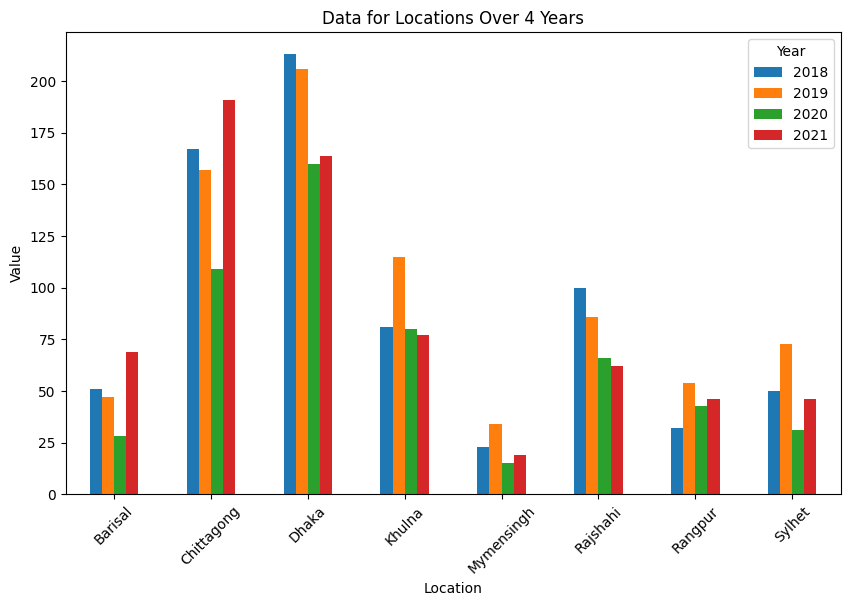

In [ ]:
import matplotlib.pyplot as plt

# Create the DataFrame from the provided data
data = {
    2018: combined_df['2018'],
    2019: combined_df['2019'],
    2020: combined_df['2020'],
    2021: combined_df['2021']
}

index = ['Barisal', 'Chittagong', 'Dhaka', 'Khulna', 'Mymensingh', 'Rajshahi', 'Rangpur', 'Sylhet']

new_df = pd.DataFrame(data, index=index)

# Create the bar plot
new_df.plot(kind='bar', figsize=(10, 6))
plt.title('Data for Locations Over 4 Years')
plt.xlabel('Location')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(title='Year')

plt.show()

In [ ]:
import calendar
i = 1
crime_per_month=[];
combined_df
while i < 13:
    count=df['admin1'].loc[df['Month']==calendar.month_name[i]].value_counts()
    print(count)
    crime_per_month.append(list(count))
    i +=1
crime_per_month

Dhaka         533
Chittagong    281
Rajshahi      271
Khulna        205
Rangpur       134
Sylhet        120
Barisal        80
Mymensingh     29
Name: admin1, dtype: int64
Dhaka         367
Chittagong    278
Khulna        195
Rajshahi      185
Sylhet         91
Rangpur        90
Barisal        66
Mymensingh     42
Name: admin1, dtype: int64
Dhaka         348
Chittagong    272
Rajshahi      201
Khulna        197
Sylhet        100
Rangpur        99
Barisal        86
Mymensingh     43
Name: admin1, dtype: int64
Dhaka         312
Chittagong    212
Khulna        190
Rajshahi      164
Sylhet         62
Rangpur        60
Barisal        50
Mymensingh     27
Name: admin1, dtype: int64
Dhaka         234
Chittagong    173
Khulna        149
Rajshahi      119
Rangpur        58
Sylhet         57
Barisal        35
Mymensingh     24
Name: admin1, dtype: int64
Dhaka         223
Chittagong    161
Khulna        145
Rajshahi      129
Rangpur        97
Sylhet         69
Barisal        39
Mymensingh     29
N

[[533, 281, 271, 205, 134, 120, 80, 29],
 [367, 278, 195, 185, 91, 90, 66, 42],
 [348, 272, 201, 197, 100, 99, 86, 43],
 [312, 212, 190, 164, 62, 60, 50, 27],
 [234, 173, 149, 119, 58, 57, 35, 24],
 [223, 161, 145, 129, 97, 69, 39, 29],
 [270, 175, 173, 116, 85, 60, 50, 25],
 [206, 180, 145, 145, 87, 76, 41, 28],
 [223, 176, 152, 130, 73, 59, 38, 17],
 [270, 224, 165, 149, 91, 88, 58, 37],
 [353, 193, 163, 160, 95, 84, 46, 33],
 [324, 253, 209, 209, 106, 87, 81, 44]]

In [ ]:
index = ['Dhaka','Chittagong','Khulna','Rajshahi','Rangpur','Sylhet','Barisal','Mymensingh']

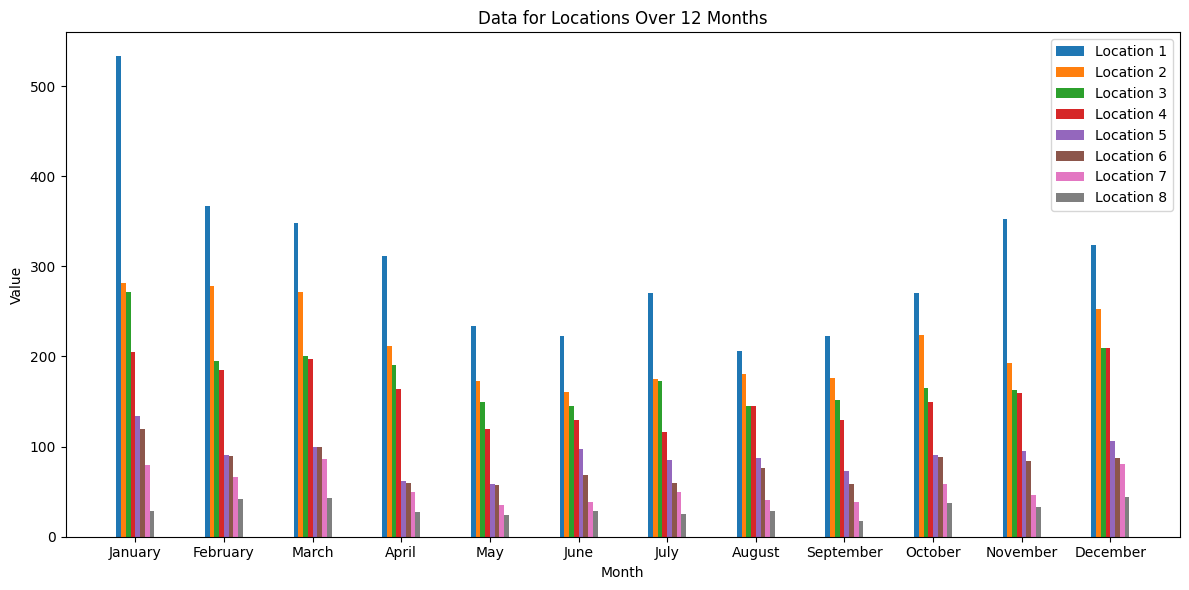

In [ ]:
# List of month names
month_names = [
    'January', 'February', 'March', 'April',
    'May', 'June', 'July', 'August',
    'September', 'October', 'November', 'December'
]

# Convert data to a NumPy array for easier manipulation
data_array = np.array(crime_per_month)

# Create the bar plot
plt.figure(figsize=(12, 6))

# Calculate the positions for each group of bars
bar_width = 0.15
gap_between_ticks = 0.2
num_locations = data_array.shape[1]
x_positions = np.arange(12) * (num_locations * (bar_width + gap_between_ticks))

# Loop through locations and plot each one
for i in range(data_array.shape[1]):
    plt.bar(x_positions + bar_width * i, data_array[:, i], width=bar_width, align='center', label=f'Location {i + 1}')

plt.xlabel('Month')
plt.ylabel('Value')
plt.title('Data for Locations Over 12 Months')
plt.xticks(x_positions + bar_width * ((num_locations - 1) / 2), month_names)
plt.legend()
plt.tight_layout()

plt.show()


In [ ]:
df['admin1'].unique()

array(['Rangpur', 'Barisal', 'Mymensingh', 'Khulna', 'Dhaka',
       'Chittagong', 'Rajshahi', 'Sylhet'], dtype=object)

In [ ]:
import pandas as pd
import calendar

# List of all 'admin1' values
admin1_values = df['admin1'].unique()

# Create an empty DataFrame to store the result
result_df = pd.DataFrame()

# Iterate through days of the week
for i in range(7):
    day_name = calendar.day_name[i]

    # Calculate value counts for each 'admin1' value for the current day
    value_counts = df['admin1'].loc[df['DayOfWeek'] == day_name].value_counts()

    # Iterate through all 'admin1' values and set count to 0 if not present
    for admin1_value in admin1_values:
        if admin1_value not in value_counts.index:
            value_counts[admin1_value] = 0

    # Sort index for consistent order
    value_counts = value_counts.sort_index()

    # Add the value counts as a new column in the result DataFrame
    result_df[day_name] = value_counts

print(result_df)

            Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday
Barisal        106       95         86        86      89       105     103
Chittagong     400      361        376       330     321       345     408
Dhaka          590      568        553       434     394       509     615
Khulna         296      337        286       284     276       336     310
Mymensingh      47       59         55        49      56        62      50
Rajshahi       316      309        302       278     204       268     301
Rangpur        132      164        127       154     125       174     146
Sylhet         136      157        158       124     106       157     168


In [ ]:
# Assuming df is your DataFrame
sunday_dhaka_records = df[(df['DayOfWeek'] == 'Sunday') & (df['admin1'] == 'Dhaka')]

sunday_dhaka_records

In [ ]:
# Assuming crime_counts_df is your DataFrame
crime_counts_df=result_df
crime_counts_df['Total'] = crime_counts_df.sum(axis=1)  # Calculate the sum of each row

# Sort the DataFrame based on the 'Total' column in descending order
sorted_df = crime_counts_df.sort_values(by='Total', ascending=False)

# Drop the 'Total' column if you don't need it in the sorted DataFrame
sorted_df = sorted_df

sorted_df

Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday  \
Dhaka          590      568        553       434     394       509     615   
Chittagong     400      361        376       330     321       345     408   
Khulna         296      337        286       284     276       336     310   
Rajshahi       316      309        302       278     204       268     301   
Rangpur        132      164        127       154     125       174     146   
Sylhet         136      157        158       124     106       157     168   
Barisal        106       95         86        86      89       105     103   
Mymensingh      47       59         55        49      56        62      50   

            Total  
Dhaka       10989  
Chittagong   7623  
Khulna       6375  
Rajshahi     5934  
Rangpur      3066  
Sylhet       3018  
Barisal      2010  
Mymensingh   1134

In [ ]:
df['event_type'].value_counts().head(15)

Riots                         8391
Violence against civilians    2984
Battles                       1790
Explosions/Remote violence     218
Name: event_type, dtype: int64

In [ ]:
!pip install geojson

In [ ]:
crime_rates

riot_count  violence_count  battle_count  explosion_count  cluster
location                                                                      
Dhaka              587             107            41               34        2
Chittagong         317              58            36                9        3
Rajshahi           249              80            32                8        3
Sylhet             248              73            22                0        3
Khulna             119              34            13                9        3
...                ...             ...           ...              ...      ...
Hosenabad            1               0             0                0        1
Hossainpur           1               0             0                0        1
Ikram                0               0             1                0        1
Ilsa                 0               1             0                0        1
Zinjira              1               0             0                0        1

[1424 rows x 5 columns]

In [ ]:
# Replace 'column_name' with the actual column name you want to use as the index
test_df = grouped_data.set_index('location')

test_df=test_df[['latitude','longitude']]
test_df['class']=crime_rates['cluster']
test_df

latitude  longitude  class
location                              
Dhaka        23.7104    90.4074      2
Chittagong   22.3571    91.7823      3
Rajshahi     24.3740    88.6011      3
Sylhet       24.8990    91.8720      3
Khulna       22.8097    89.5643      3
...              ...        ...    ...
Hosenabad    24.0452    88.8386      1
Hossainpur   23.6565    88.9392      1
Ikram        24.3998    91.2926      1
Ilsa         22.0750    91.9013      1
Zinjira      23.7044    90.3929      1

[1424 rows x 3 columns]

In [ ]:
test_df_1=test_df[(test_df['class'] == 1)]
test_df_2=test_df[(test_df['class'] == 2)]
test_df_3=test_df[(test_df['class'] == 3)]
test_df_4=test_df[(test_df['class'] == 4)]

In [ ]:
import folium
import json

colors = {1 : 'red', 2 : 'blue', 3: 'black', 4:'green'}

map_osm = folium.Map(location=[23.7104, 90.4074], zoom_start=11)

test_df.apply(lambda row:folium.Marker(location=[row["latitude"], row["longitude"]],
                                              radius=5, icon=folium.Icon(color=colors[row['class']]), popup=row['class'])
                                             .add_to(map_osm), axis=1)
map_osm

In [ ]:
import folium
import json

colors = {1 : 'red', 2 : 'blue', 3: 'yellow', 4:'green'}

map_osm = folium.Map(location=[23.7104, 90.4074], zoom_start=11)

test_df_1.apply(lambda row:folium.CircleMarker(location=[row["latitude"], row["longitude"]],
                                              radius=2, fill_color=colors[row['class']], popup=row['class'])
                                             .add_to(map_osm), axis=1)

map_osm

In [ ]:
import folium
import json

colors = {1 : 'red', 2 : 'blue', 3: 'black', 4:'green'}

map_osm = folium.Map(location=[23.7104, 90.4074], zoom_start=11)

test_df_2.apply(lambda row:folium.Marker(location=[row["latitude"], row["longitude"]],
                                              radius=5, icon=folium.Icon(color=colors[row['class']]), popup=row['class'])
                                             .add_to(map_osm), axis=1)
map_osm

In [ ]:
import folium
import json

colors = {1 : 'red', 2 : 'blue', 3: 'black', 4:'green'}

map_osm = folium.Map(location=[23.7104, 90.4074], zoom_start=11)

test_df_3.apply(lambda row:folium.Marker(location=[row["latitude"], row["longitude"]],
                                              radius=5, icon=folium.Icon(color=colors[row['class']]), popup=row['class'])
                                             .add_to(map_osm), axis=1)
map_osm

In [ ]:
import folium
import json

colors = {1 : 'red', 2 : 'blue', 3: 'black', 4:'green'}

map_osm = folium.Map(location=[23.7104, 90.4074], zoom_start=11)

test_df_4.apply(lambda row:folium.Marker(location=[row["latitude"], row["longitude"]],
                                              radius=5, icon=folium.Icon(color=colors[row['class']]), popup=row['class'])
                                             .add_to(map_osm), axis=1)
map_osm

# Data Preprocessing

In [ ]:
import datetime

# Convert Unix timestamps to hours and create a new 'Hour' column
df['Hour'] = df['timestamp'].apply(lambda ts: datetime.datetime.fromtimestamp(ts).hour)
df[['timestamp','Hour']]

timestamp  Hour
0      1636483659    18
1      1636483659    18
2      1636483660    18
3      1636483660    18
4      1636483660    18
...           ...   ...
13378  1563366746    12
13379  1563366746    12
13380  1563366746    12
13381  1618526280    22
13382  1618526282    22

[13383 rows x 2 columns]

In [ ]:
# though these two columns are not needed in the train dataset, yet for furthur research purposes, these two columns are being eliminated.
df=df.drop(['assoc_actor_2','assoc_actor_1'],axis=1)
# axis = 1, means we are dropping the column, not the row

# inplace=True performs the drop operation in the same dataframe
# df.index[2:4] generates a range of rows from 2 to 4.
# The lower limit of the range is inclusive and the upper limit of the range is exclusive.
# This means that rows 2 and 3 will be deleted and row 4 will not be deleted.
# axis=0 denotes that rows should be deleted from the dataframe

set_need_to_be_removed=set(df.index[df.actor2.isnull()]).union(df.index[df.admin3.isnull()])
df.drop(set_need_to_be_removed,inplace=True,axis=0)
df


data_id  iso event_id_cnty  event_id_no_cnty        event_date  year  \
0      8640734   50      BGD20764             20764  01 November 2021  2021   
1      8640735   50      BGD20765             20765  01 November 2021  2021   
2      8641081   50      BGD20759             20759  01 November 2021  2021   
3      8641083   50      BGD20762             20762  01 November 2021  2021   
4      8641092   50      BGD20761             20761  01 November 2021  2021   
...        ...  ...           ...               ...               ...   ...   
13378  5588230   50       BGD7246              7246   01 January 2010  2010   
13379  5588231   50       BGD7247              7247   01 January 2010  2010   
13380  5588232   50       BGD7248              7248   01 January 2010  2010   
13381  6307185   50       BGD7238              7238   01 January 2010  2010   
13382  7547749   50       BGD7244              7244   01 January 2010  2010   

       time_precision                  event_type         sub_event_type  \
0                   1  Violence against civilians                 Attack   
1                   1                       Riots  Violent demonstration   
2                   1                       Riots           Mob violence   
3                   1                       Riots           Mob violence   
4                   1                       Riots           Mob violence   
...               ...                         ...                    ...   
13378               1                       Riots           Mob violence   
13379               1                       Riots           Mob violence   
13380               1                       Riots           Mob violence   
13381               1                     Battles            Armed clash   
13382               1                     Battles            Armed clash   

                                    actor1  ...  \
0      Police Forces of Bangladesh (2009-)  ...   
1                     Rioters (Bangladesh)  ...   
2                     Rioters (Bangladesh)  ...   
3                     Rioters (Bangladesh)  ...   
4                     Rioters (Bangladesh)  ...   
...                                    ...  ...   
13378                 Rioters (Bangladesh)  ...   
13379                 Rioters (Bangladesh)  ...   
13380                 Rioters (Bangladesh)  ...   
13381       BCL: Bangladesh Chhatra League  ...   
13382       BCL: Bangladesh Chhatra League  ...   

                                              source source_scale  \
0      New Age (Bangladesh); Daily Star (Bangladesh)     National   
1      Daily Star (Bangladesh); New Age (Bangladesh)     National   
2                                        Prothom Alo     National   
3                                        Prothom Alo     National   
4                                        Prothom Alo     National   
...                                              ...          ...   
13378                        Daily Star (Bangladesh)     National   
13379                        Daily Star (Bangladesh)     National   
13380                        Daily Star (Bangladesh)     National   
13381                              Right Vision News     Regional   
13382                        Daily Star (Bangladesh)     National   

                                                   notes  fatalities  \
0      On 1 November 2021, police personnel beat up a...           1   
1      On 1 November 2021, hundreds of locals attacke...           0   
2      On 1 November 2021, a clash broke out between ...           0   
3      On 1 November 2021, a clash broke out between ...           0   
4      On 1 November 2021, a group of assailants beat...           0   
...                                                  ...         ...   
13378  On 1 Jan 2010, in Morelganj upazila (Bagerhat,...           0   
13379  On 1 Jan 2010, in Kachua upazila (Bagerhat, Kh...           0   
13380  On 1 Jan 2010, in Moghia (Kachua, Bagerhat, Kh..

In [ ]:
df.columns

Index(['data_id', 'iso', 'event_id_cnty', 'event_id_no_cnty', 'event_date',
       'year', 'time_precision', 'event_type', 'sub_event_type', 'actor1',
       'inter1', 'actor2', 'inter2', 'interaction', 'region', 'country',
       'admin1', 'admin2', 'admin3', 'location', 'latitude', 'longitude',
       'geo_precision', 'source', 'source_scale', 'notes', 'fatalities',
       'timestamp', 'iso3', 'Hour', 'format_dates', 'DayOfWeek', 'Month'],
      dtype='object')

# Feature Importance with Random Forest

In [ ]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import make_column_selector as selector
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Remove columns from the list that are not relevant.
targets = [
       'event_date',
       'Hour', #num
       'day',
       'DayOfWeek',
       'Month',
       'year', # num
       'admin3',
       'location', #cat
       'latitude', #num
       'longitude', #num
       'timestamp'
      ]

In [ ]:
column_trans = ColumnTransformer(transformers=
        [('num', MinMaxScaler(), selector(dtype_exclude="object")),
        ('cat', OrdinalEncoder(), selector(dtype_include="object"))],
        remainder='drop')


In [ ]:

# Create a random forest classifier for feature importance
clf = RandomForestClassifier(random_state=42, n_jobs=6, class_weight='balanced')

pipeline = Pipeline([('prep',column_trans),
                        ('clf', clf)])

In [ ]:
# Split the data into 30% test and 70% training
X_train1, X_test1, y_train1, y_test1 = train_test_split(df[targets], df['sub_event_type'], test_size=0.2, random_state=0)

In [ ]:
pipeline.fit(X_train1, y_train1)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x797ec750df60>),
                                                 ('cat', OrdinalEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x797ec750ead0>)])),
                ('clf',
                 RandomForestClassifier(class_weight='balanced', n_jobs=6,
                                        random_state=42))])

In [ ]:
pipeline['clf'].feature_importances_

array([0.03548545, 0.07711698, 0.09994546, 0.1267455 , 0.13237192,
       0.09776758, 0.11054296, 0.06647934, 0.0744732 , 0.08819682,
       0.09087477])

In [ ]:
feat_list = []

total_importance = 0
# Print the name and gini importance of each feature
for feature in zip(targets, pipeline['clf'].feature_importances_):
    feat_list.append(feature)
    total_importance += feature[1]

included_feats = []
# Print the name and gini importance of each feature
for feature in zip(targets, pipeline['clf'].feature_importances_):
    if feature[1] > .05:
        included_feats.append(feature[0])

print('\n',"Cumulative Importance =", total_importance)

# create DataFrame using data
df_imp = pd.DataFrame(feat_list, columns =['FEATURE', 'IMPORTANCE']).sort_values(by='IMPORTANCE', ascending=False)
df_imp['CUMSUM'] = df_imp['IMPORTANCE'].cumsum()
df_imp


 Cumulative Importance = 1.0


FEATURE  IMPORTANCE    CUMSUM
4        Month    0.132372  0.132372
3    DayOfWeek    0.126745  0.259117
6       admin3    0.110543  0.369660
2          day    0.099945  0.469606
5         year    0.097768  0.567373
10   timestamp    0.090875  0.658248
9    longitude    0.088197  0.746445
1         Hour    0.077117  0.823562
8     latitude    0.074473  0.898035
7     location    0.066479  0.964515
0   event_date    0.035485  1.000000

In [ ]:
print('Most Important Features:')
print(included_feats)
print('Number of Included Features =', len(included_feats))

Most Important Features:
['Hour', 'day', 'DayOfWeek', 'Month', 'year', 'admin3', 'location', 'latitude', 'longitude', 'timestamp']
Number of Included Features = 10


# ML training

In [ ]:
# Remove columns from the list that are not relevant.
targets = [
       'event_date',
       'Hour', #num
       'day',
       'DayOfWeek',
       'Month',
       'year', # num
      #  'admin1',
      #  'admin2',
       'admin3',
       'location', #cat
       'latitude', #num
       'longitude', #num
       'timestamp'
      ]

In [ ]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import make_column_selector as selector
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11594 entries, 0 to 13382
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   data_id           11594 non-null  int64         
 1   iso               11594 non-null  int64         
 2   event_id_cnty     11594 non-null  object        
 3   event_id_no_cnty  11594 non-null  int64         
 4   event_date        11594 non-null  object        
 5   year              11594 non-null  int64         
 6   time_precision    11594 non-null  int64         
 7   event_type        11594 non-null  object        
 8   sub_event_type    11594 non-null  object        
 9   actor1            11594 non-null  object        
 10  inter1            11594 non-null  int64         
 11  actor2            11594 non-null  object        
 12  inter2            11594 non-null  int64         
 13  interaction       11594 non-null  int64         
 14  region            1159

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
# Assuming X_train is your training data
# scaler = MinMaxScaler()
scaler = StandardScaler()
# encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
encoder=OneHotEncoder(handle_unknown='infrequent_if_exist',sparse_output=False).set_output(transform="pandas")

column_trans = ColumnTransformer(transformers=
        [('num', scaler , selector(dtype_exclude="object")),
        ('cat', encoder, selector(dtype_include="object"))],
        remainder='drop')

In [ ]:
# Create a random forest classifier for feature importance
clf = RandomForestClassifier(random_state=42, n_jobs=6, class_weight='balanced')

pipeline = Pipeline([('prep',column_trans),
                        ('clf', clf)])

In [ ]:
# Split the data into 20% test and 80% training
X_train, X_test, y_train, y_test = train_test_split(df[targets], df['event_type'], test_size=0.15, random_state=0)

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x797ec8f5d120>),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x797ec8e80310>)])),
                ('clf',
                 RandomForestClassifier(class_weight='balanced', n_jobs=6,
                                        random_state=42))])

In [ ]:
def fun_results(result):
    print('mean: ' + str(result.mean()))
    print('max: ' + str(result.max()))
    print('min: ' + str(result.min()))
    return result

In [ ]:
from sklearn import metrics

In [ ]:
def fun_results2(pred):
    print(confusion_matrix(y_test,pred))
    print('\n')
    print(classification_report(y_test,pred))

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
neigh_pred = pipeline.predict(X_test)
neigh_score = f1_score(y_test, neigh_pred, average=None)
fun_results(neigh_score)

mean: 0.36063199180800287
max: 0.7685001978630787
min: 0.08333333333333333


array([0.25903614, 0.08333333, 0.7685002 , 0.33165829])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.semi_supervised import LabelSpreading
from sklearn.svm import LinearSVC
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [ ]:
def fun_DecisionTreeClassifier(X_train, Y_train):
    model = DecisionTreeClassifier()
    pipeline = Pipeline([('prep',column_trans),
                        ('clf', model)])
    res = pipeline.fit(X_train, Y_train)
    y_train_pred = res.predict(X_train)
    print("traning accuracy: ",metrics.accuracy_score(y_train, y_train_pred));

    pred = res.predict(X_test)

    dec_tree_score = f1_score(y_test, pred, average=None)
    return fun_results2(pred)

fun_DecisionTreeClassifier(X_train, y_train)

traning accuracy:  0.9908666531357824
[[ 76   2 123  49]
 [  5   2   6   8]
 [ 87  10 786 164]
 [ 47   2 214 159]]


                            precision    recall  f1-score   support

                   Battles       0.35      0.30      0.33       250
Explosions/Remote violence       0.12      0.10      0.11        21
                     Riots       0.70      0.75      0.72      1047
Violence against civilians       0.42      0.38      0.40       422

                  accuracy                           0.59      1740
                 macro avg       0.40      0.38      0.39      1740
              weighted avg       0.57      0.59      0.58      1740



In [ ]:
# BernoulliNB

def fun_BernoulliNB(X_train, Y_train):
    model = BernoulliNB()
    pipeline = Pipeline([('prep',column_trans),
                        ('clf', model)])
    res = pipeline.fit(X_train, Y_train)
    y_train_pred = res.predict(X_train)
    print("traning accuracy: ",metrics.accuracy_score(y_train, y_train_pred));

    pred = res.predict(X_test)

    dec_tree_score = f1_score(y_test, pred, average=None)
    return fun_results2(pred)

fun_BernoulliNB(X_train, y_train)

traning accuracy:  0.7181855084229755
[[ 41   0 157  52]
 [  1   0  15   5]
 [ 36   0 896 115]
 [ 24   0 275 123]]


                            precision    recall  f1-score   support

                   Battles       0.40      0.16      0.23       250
Explosions/Remote violence       0.00      0.00      0.00        21
                     Riots       0.67      0.86      0.75      1047
Violence against civilians       0.42      0.29      0.34       422

                  accuracy                           0.61      1740
                 macro avg       0.37      0.33      0.33      1740
              weighted avg       0.56      0.61      0.57      1740



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
def fun_ExtraTreeClassifier(X_train, Y_train):
    model = ExtraTreeClassifier()
    pipeline = Pipeline([('prep',column_trans),
                        ('clf', model)])
    res = pipeline.fit(X_train, Y_train)

    y_train_pred = res.predict(X_train)
    print("traning accuracy: ",metrics.accuracy_score(y_train, y_train_pred));

    pred = res.predict(X_test)

    dec_tree_score = f1_score(y_test, pred, average=None)
    return fun_results2(pred)

fun_ExtraTreeClassifier(X_train, y_train)

traning accuracy:  0.9908666531357824
[[ 66   4 128  52]
 [  1   4  13   3]
 [126  15 720 186]
 [ 59   9 220 134]]


                            precision    recall  f1-score   support

                   Battles       0.26      0.26      0.26       250
Explosions/Remote violence       0.12      0.19      0.15        21
                     Riots       0.67      0.69      0.68      1047
Violence against civilians       0.36      0.32      0.34       422

                  accuracy                           0.53      1740
                 macro avg       0.35      0.36      0.36      1740
              weighted avg       0.53      0.53      0.53      1740



Text(0, 0.5, 'Error Rate')

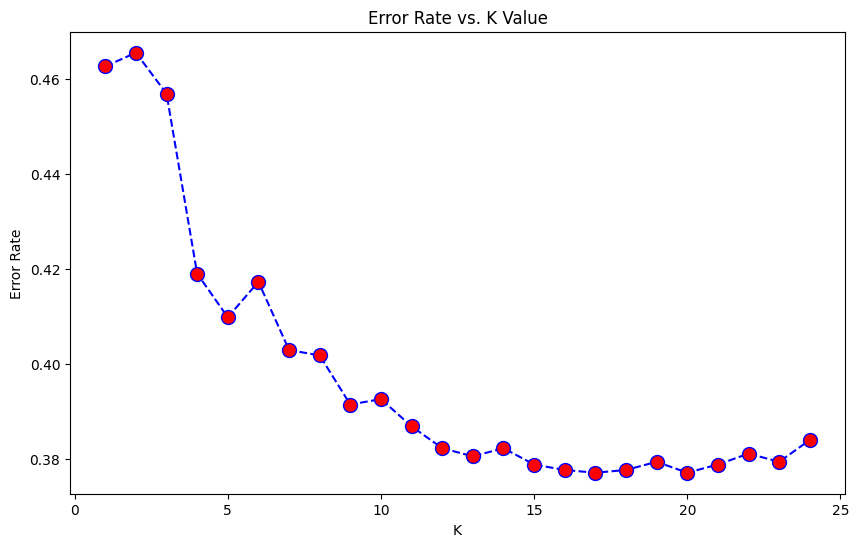

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import classification_report,confusion_matrix
error_rate = []

# Will take some time
for i in range(1,25):

    knn = KNeighborsClassifier(n_neighbors=i)
    pipeline = Pipeline([('prep',column_trans),
                        ('clf', knn)])
    # y_train_pred = res.predict(X_train)
    # print("traning accuracy: ",metrics.accuracy_score(y_train, y_train_pred));
    pipeline.fit(X_train,y_train)
    pred_i = pipeline.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

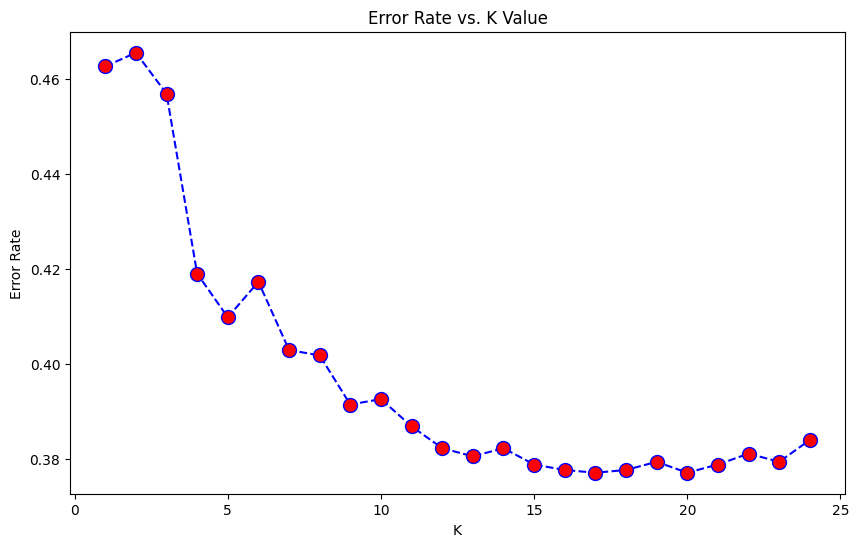

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,25),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
def fun_KNeighborsClassifier(X_train, Y_train):
    model = KNeighborsClassifier(n_neighbors=20)
    pipeline = Pipeline([('prep',column_trans),
                        ('clf', model)])
    res = pipeline.fit(X_train, Y_train)
    y_train_pred = res.predict(X_train)
    print("traning accuracy: ",metrics.accuracy_score(y_train, y_train_pred));

    pred = res.predict(X_test)

    dec_tree_score = f1_score(y_test, pred, average=None)
    print('WITH K=21')
    print('\n')
    print(confusion_matrix(y_test,pred))
    print('\n')
    print(classification_report(y_test,pred))
    return fun_results(dec_tree_score)

fun_KNeighborsClassifier(X_train, y_train)

traning accuracy:  0.6415668763953725
WITH K=21


[[ 42   0 180  28]
 [  0   0  15   6]
 [ 33   0 967  47]
 [ 20   0 327  75]]


                            precision    recall  f1-score   support

                   Battles       0.44      0.17      0.24       250
Explosions/Remote violence       0.00      0.00      0.00        21
                     Riots       0.65      0.92      0.76      1047
Violence against civilians       0.48      0.18      0.26       422

                  accuracy                           0.62      1740
                 macro avg       0.39      0.32      0.32      1740
              weighted avg       0.57      0.62      0.56      1740

mean: 0.3164030320834474
max: 0.7626182965299684
min: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.24347826, 0.        , 0.7626183 , 0.25951557])

In [ ]:
def fun_RandomForestClassifier(X_train, Y_train):
    model = RandomForestClassifier(max_depth=60,n_estimators=300)
    pipeline = Pipeline([('prep',column_trans),
                        ('clf', model)])
    res = pipeline.fit(X_train, Y_train)
    y_train_pred = res.predict(X_train)
    print("traning accuracy: ",metrics.accuracy_score(y_train, y_train_pred));

    pred = res.predict(X_test)

    dec_tree_score = f1_score(y_test, pred, average=None)
    return fun_results2(pred)

fun_RandomForestClassifier(X_train, y_train)

traning accuracy:  0.725898112441648
[[  14    0  215   21]
 [   0    0   18    3]
 [   5    0 1025   17]
 [   5    0  344   73]]


                            precision    recall  f1-score   support

                   Battles       0.58      0.06      0.10       250
Explosions/Remote violence       0.00      0.00      0.00        21
                     Riots       0.64      0.98      0.77      1047
Violence against civilians       0.64      0.17      0.27       422

                  accuracy                           0.64      1740
                 macro avg       0.47      0.30      0.29      1740
              weighted avg       0.62      0.64      0.55      1740



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
def fun_LGBMClassifier(X_train, Y_train):
    model = LGBMClassifier(max_bin=255,max_depth=60,n_estimators=300,boosting='dart',num_leaves=31, learning_rate=0.1)
    pipeline = Pipeline([('prep',column_trans),
                        ('clf', model)])
    res = pipeline.fit(X_train, Y_train)
    y_train_pred = res.predict(X_train)
    print("traning accuracy: ",metrics.accuracy_score(y_train, y_train_pred));
    pred = res.predict(X_test)
    dec_tree_score = f1_score(y_test, pred, average=None)
    return fun_results2(pred)

fun_LGBMClassifier(X_train, y_train)

[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000672 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1379
[LightGBM] [Info] Number of data points in the train set: 9854, number of used features: 283
[LightGBM] [Info] Start training from score -1.883079
[LightGBM] [Info] Start training from score -4.282978
[LightGBM] [Info] Start training from score -0.536072
[Light

In [ ]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
#Create an instance
def fun_BalancedBaggingClassifier(X_train, Y_train):
    model = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                    sampling_strategy='not majority',
                                    replacement=False,
                                    random_state=42)
    pipeline = Pipeline([('prep',column_trans),
                            ('clf', model)])
    res = pipeline.fit(X_train, Y_train)
    y_train_pred = res.predict(X_train)
    print("traning accuracy: ",metrics.accuracy_score(y_train, y_train_pred));
    pred = res.predict(X_test)
    dec_tree_score = f1_score(y_test, pred, average=None)
    return fun_results2(pred)

fun_BalancedBaggingClassifier(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


traning accuracy:  0.6160949868073878
[[   1    6  242    1]
 [   0    3   18    0]
 [   1    8 1038    0]
 [   2    3  386   31]]


                            precision    recall  f1-score   support

                   Battles       0.25      0.00      0.01       250
Explosions/Remote violence       0.15      0.14      0.15        21
                     Riots       0.62      0.99      0.76      1047
Violence against civilians       0.97      0.07      0.14       422

                  accuracy                           0.62      1740
                 macro avg       0.50      0.30      0.26      1740
              weighted avg       0.64      0.62      0.49      1740

